# Data Visualization 

In [1]:
import matplotlib.pyplot as plt
# This is a standard import of matplotlib

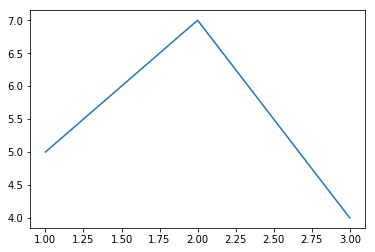

In [2]:
# A simple plot from matplotlib
plt.plot([1,2,3],[5,7,4])

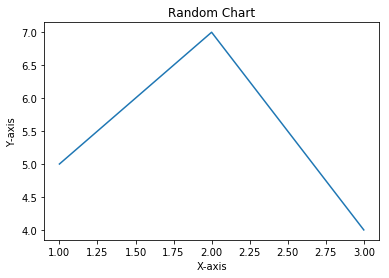

In [3]:
# Let's add titles on this plot
plt.plot([1,2,3],[5,7,4])
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.show()

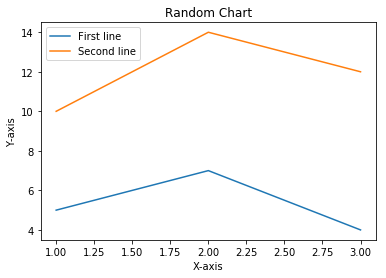

In [4]:
# We can add legend to this chart as well. let's plot 2 lines now
plt.plot([1,2,3],[5,7,4], label = "First line") # label is just what is going to appear on the legend.
plt.plot([1,2,3],[10,14,12], label = "Second line")
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.legend() # This is going to invoke and legend
plt.show()

## Bar Charts

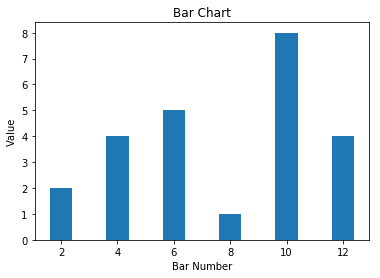

In [5]:
plt.bar([2,4,6,8,10,12],[2,4,5,1,8,4]) # single bar chart
plt.xlabel("Bar Number") # Label for x axis
plt.ylabel("Value") # Label for y axis
plt.title("Bar Chart") # Chart Title
#plt.legend() # This is going to invoke and legend
plt.show()

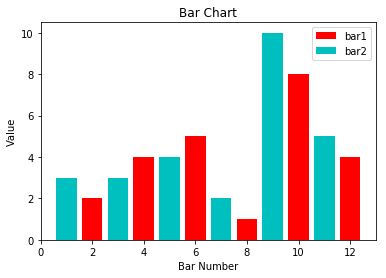

In [6]:
# Bar chart for 2 tables. Bar charts are usually used to compare 2 columns of values.
plt.bar([2,4,6,8,10,12],[2,4,5,1,8,4], label = "bar1", color = "r")
plt.bar([1,3,5,7,9,11],[3,3,4,2,10,5], label = "bar2", color = "c")

plt.xlabel("Bar Number") # Label for x axis
plt.ylabel("Value") # Label for y axis
plt.title("Bar Chart") # Chart Title
plt.legend() # This is going to invoke and legend
plt.show()

## Histograms
Histograms are used to show the distribution of a variable

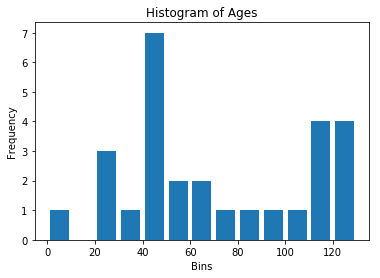

In [7]:
# Let's we have array of people age in a survey.
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]

# Now we wants to see the distribution of age. We first need to create bins for this variable.
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype = "bar",rwidth = 0.8) # histtype is for what kind of histogram we want.
# rwidth is the width of the bar. We make it a little less than 1 so they wont collide.
plt.xlabel("Bins") # Label for x axis
plt.ylabel("Frequency") # Label for y axis
plt.title("Histogram of Ages") # Chart Title
# plt.legend() # This is going to invoke and legend
plt.show()

## Scatter Plot
Scatter plots are usually used to see relationship between 2 variables

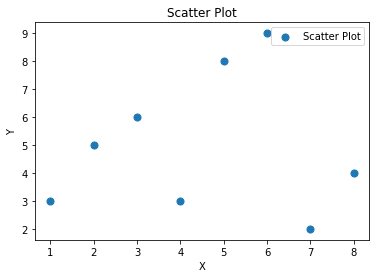

In [14]:
x = [1,2,3,4,5,6,7,8]
y = [3,5,6,3,8,9,2,4]

plt.scatter(x,y, label = "Scatter Plot", s = 50) # s stands for size. we can also change the marker by using marker argument.
plt.xlabel("X") # Label for x axis
plt.ylabel("Y") # Label for y axis
plt.title("Scatter Plot") # Chart Title
plt.legend() # This is going to invoke and legend
plt.show()

## Stack Plot
Stack plot are used to show the contribution of each "part of a whole" over time.

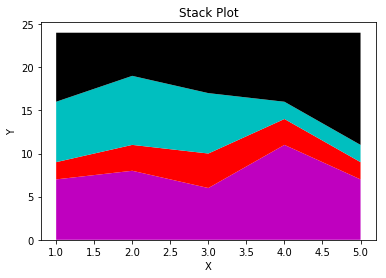

In [21]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

plt.stackplot(days, sleeping, eating, working, playing, colors = ["m","r","c","k"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Stack Plot")
plt.show()

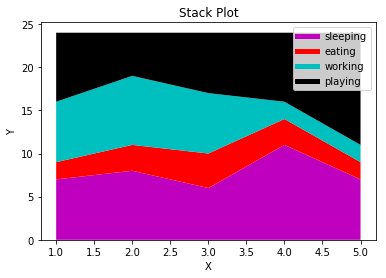

In [23]:
# The stackplot does not producea legend which is necessary in the stack plot. So we will find another way to do that.
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

plt.plot([],[], color = "m", label = "sleeping", linewidth = 5)
plt.plot([],[], color = "r", label = "eating", linewidth = 5)
plt.plot([],[], color = "c", label = "working", linewidth = 5)
plt.plot([],[], color = "k", label = "playing", linewidth = 5)

plt.stackplot(days, sleeping, eating, working, playing, colors = ["m","r","c","k"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Stack Plot")
plt.legend()
plt.show()

## Pie charts

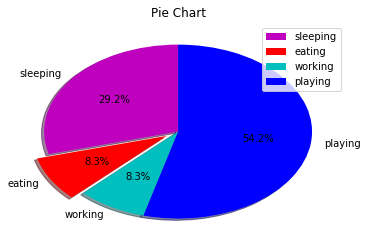

In [34]:
slices = [7,2,2,13] # Values that will decide the size of pies.
activities = ["sleeping","eating","working","playing"]

plt.pie(slices, labels = activities, colors = ["m","r","c","b"], 
        autopct = "%1.1f%%", # autopct for adding percentages in slices.
        shadow = True,
        startangle = 90, # The angle at which the pie starts adding slices
        explode = [0,0.1,0,0]) # explode will take slice out of the pie for more attention.
plt.title("Pie Chart")
plt.legend()
plt.show()

## Reading data from a file and plotting

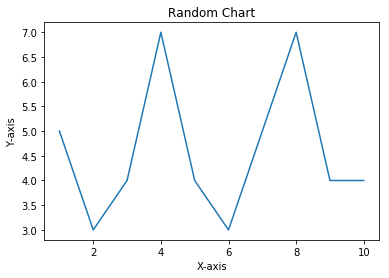

In [36]:
# Now we will look at how to read data from an external file and use it plot data.
# We are going to use csv module for that.
import csv

x = []
y = []

with open("/Users/ankittyagi/Desktop/Python Tutorial/Data-Analysis-in-Python/Dataset/example.txt","r") as csv_file:
    plots = csv.reader(csv_file, delimiter = ",")
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y)
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.show()

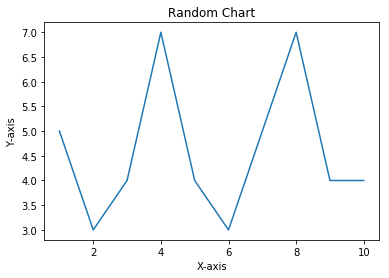

In [37]:
# Another easier way of doing that is to use numpy loadtxt.
import numpy as np
x,y = np.loadtxt("/Users/ankittyagi/Desktop/Python Tutorial/Data-Analysis-in-Python/Dataset/example.txt",
                delimiter = ",", unpack = True)

plt.plot(x,y)
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.show()

## Reading data from internet and plotting

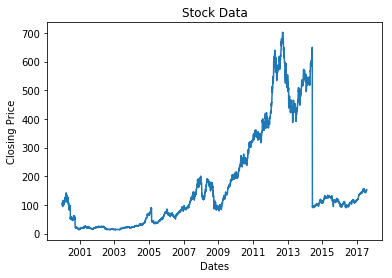

In [53]:
# Reading data from internet and using for plots.
import urllib
import matplotlib.dates as mdates

# Function for converting the datestamps to time that matplolib understands.
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})

    plt.plot_date(date, closep, '-')
    plt.xlabel("Dates") # Label for x axis
    plt.ylabel("Closing Price") # Label for y axis
    plt.title("Stock Data") # Chart Title
    plt.show()
    
graph_data("TSLA")

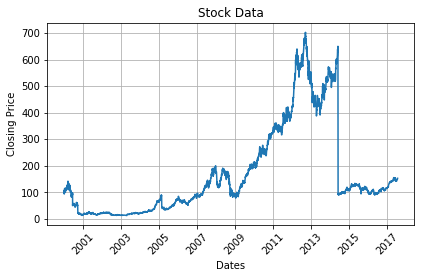

In [58]:
# Now we are going to customize the above graph.
# Reading data from internet and using for plots.
import urllib
import matplotlib.dates as mdates

# Function for converting the datestamps to time that matplolib understands.
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})
    # In case we have unix time which is count of seconds from july 1970. We don't need the converters argument.
    # Instead of that we can do something like
    #dateconv = np.vectorize(dt.datetime.fromtimestamp)
    #date = dateconv(date)

    plt.plot_date(date, closep, '-')
    plt.xlabel("Dates") # Label for x axis
    plt.ylabel("Closing Price") # Label for y axis
    plt.xticks(rotation = 45) # rotate the x axis labels
    plt.grid(True)
    plt.title("Stock Data") # Chart Title
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    plt.show()
    
graph_data("TSLA")